In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

初始采样

In [84]:
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter
sample_size = 100
max_iter = 2000
x_range = [-2, 1]
y_range = [-1.5, 1.5]

# 计算每边的点数（近似平方根）
points_per_side = sample_size

# 在指定范围内生成均匀分布的点
x_values = np.linspace(x_range[0], x_range[1], points_per_side)
y_values = np.linspace(y_range[0], y_range[1], points_per_side)

# 对每个点进行迭代计算
results = []
for x in x_values:
    for y in y_values:
        c = complex(x, y)
        iteration = mandelbrot(c, max_iter)
        results.append((x, y, iteration))
print(len(results))

10000


构建网格

In [86]:
# 定义结构化数据类型来存储每个点的x范围，y范围和迭代次数
dtype = [('x_range', float, (2,)), ('y_range', float, (2,)), ('iteration', int)]

# 创建一个结构化数组来存储这些值
structured_grid = np.zeros((points_per_side, points_per_side), dtype=dtype)

# 计算每个点的x和y范围以及迭代次数
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        c = complex(x, y)
        iteration = mandelbrot(c, max_iter)

        # 计算x和y的范围
        x_range = [x_values[0] + (i/points_per_side) * (x_values[-1] - x_values[0]), 
                   x_values[0] + ((i+1)/points_per_side) * (x_values[-1] - x_values[0])]
        y_range = [y_values[0] + (j/points_per_side) * (y_values[-1] - y_values[0]), 
                   y_values[0] + ((j+1)/points_per_side) * (y_values[-1] - y_values[0])]

        # 将这些值存储在结构化数组中
        structured_grid[j, i] = (x_range, y_range, iteration)





#可视化

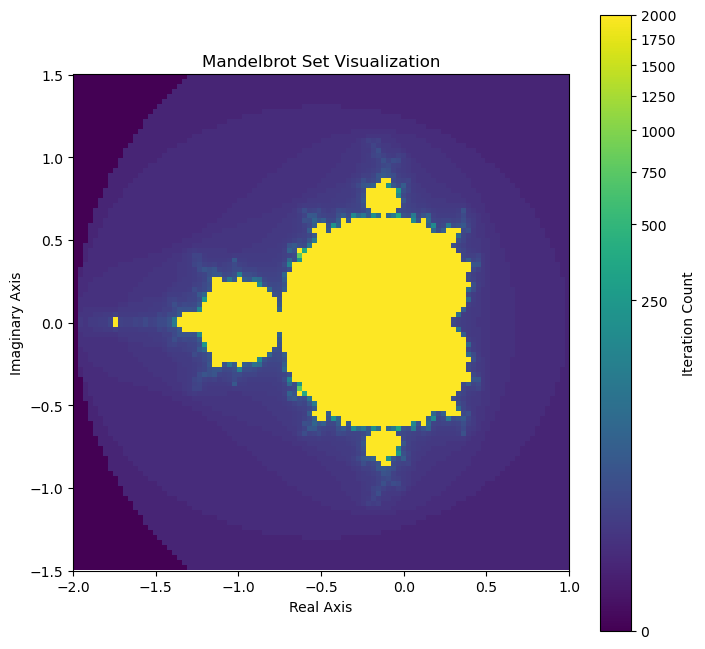

In [69]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 提取迭代次数数据用于绘图
iteration_data = structured_grid['iteration']

# 创建一个颜色映射，较高的迭代次数对应较暗的颜色
cmap = plt.cm.viridis
norm = mcolors.PowerNorm(0.3, vmin=iteration_data.min(), vmax=iteration_data.max())

# 绘制曼德布洛特集
plt.figure(figsize=(8, 8))
plt.imshow(iteration_data, cmap=cmap, norm=norm, extent=[-2, 1, -1.5, 1.5])
plt.colorbar(label='Iteration Count')
plt.title('Mandelbrot Set Visualization')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()


获得boundary_grid_list（不带最近的2000点）

In [77]:
boundary_grid_list = []

# 收集迭代次数在10到1999之间的点，同时记录它们在原始网格中的索引
points_to_check = []
for i in range(points_per_side):
    for j in range(points_per_side):
        if 10 <= structured_grid['iteration'][j, i] < 2000:
            points_to_check.append((structured_grid[j, i], i, j))  # 存储点的数据和索引
print(len(points_to_check))
for point, x_index, y_index in points_to_check:
    boundary_grid_list.append(point)  # 加入初始点


# 将列表转换为numpy数组
boundary_grid = np.array(boundary_grid_list, dtype=structured_grid.dtype)
print(len(points_to_check))
# 检查boundary_grid的一部分内容
print(boundary_grid[:10])  # 展示前10个元素以示例


548
548
[([-1.79, -1.76], [-0.03,  0.  ], 11) ([-1.79, -1.76], [ 0.  ,  0.03], 11)
 ([-1.64, -1.61], [-0.03,  0.  ], 10) ([-1.64, -1.61], [ 0.  ,  0.03], 10)
 ([-1.58, -1.55], [-0.03,  0.  ], 13) ([-1.58, -1.55], [ 0.  ,  0.03], 13)
 ([-1.52, -1.49], [-0.03,  0.  ], 10) ([-1.52, -1.49], [ 0.  ,  0.03], 10)
 ([-1.49, -1.46], [-0.06, -0.03], 11) ([-1.49, -1.46], [-0.03,  0.  ], 14)]


boundary_grid_list带最近的2000点

In [346]:
boundary_grid_list = []
init_threshold = 100
# 收集迭代次数在10到1999之间的点，同时记录它们在原始网格中的索引
points_to_check = []
for i in range(points_per_side):
    for j in range(points_per_side):
        if init_threshold <= structured_grid['iteration'][j, i] < 2000:
            points_to_check.append((structured_grid[j, i], i, j))  # 存储点的数据和索引
print(len(points_to_check))

for point, x_index, y_index in points_to_check:
    # 加入初始点，如果它尚未存在于列表中
    boundary_grid_list.append(point)

    # 检查四个相邻的网格点并添加它们，如果它们尚未存在于列表中#存在重复添加也没事
    if x_index > 0:
        left_neighbor = structured_grid[y_index, x_index - 1]
        if left_neighbor['iteration'] == 2000:
            boundary_grid_list.append(left_neighbor)

    if x_index < points_per_side - 1:
        right_neighbor = structured_grid[y_index, x_index + 1]
        if right_neighbor['iteration'] == 2000:
            boundary_grid_list.append(right_neighbor)

    if y_index > 0:
        top_neighbor = structured_grid[y_index - 1, x_index]
        if top_neighbor['iteration'] == 2000:
            boundary_grid_list.append(top_neighbor)

    if y_index < points_per_side - 1:
        bottom_neighbor = structured_grid[y_index + 1, x_index]
        if bottom_neighbor['iteration'] == 2000:
            boundary_grid_list.append(bottom_neighbor)

# 将列表转换为numpy数组
boundary_grid = np.array(boundary_grid_list, dtype=structured_grid.dtype)
print(len(boundary_grid))
# 检查boundary_grid的一部分内容
print(boundary_grid[:10])  # 展示前10个元素以示例


352
870
[([-1.4 , -1.39], [-0.01,  0.  ],  191)
 ([-1.39, -1.38], [-0.01,  0.  ], 2000)
 ([-1.37, -1.36], [ 0.01,  0.02],  141)
 ([-1.36, -1.35], [ 0.01,  0.02], 2000)
 ([-1.37, -1.36], [ 0.  ,  0.01], 2000)
 ([-1.37, -1.36], [ 0.02,  0.03],  218)
 ([-1.36, -1.35], [ 0.02,  0.03], 2000)
 ([-1.36, -1.35], [ 0.03,  0.04],  467)
 ([-1.35, -1.34], [ 0.03,  0.04], 2000)
 ([-1.36, -1.35], [ 0.02,  0.03], 2000)]


对于boundary_grid_list中的网格进行模拟，控制总模拟数不超过1万次

In [80]:
import math

# 定义总模拟次数上限
total_max_simulations = 10000

# 计算每个网格的最大模拟次数
num_points = len(boundary_grid_list)
max_simulations_per_point = total_max_simulations // num_points

# 找到不大于max_simulations_per_point的最大平方数
square_root = int(math.sqrt(max_simulations_per_point))
max_simulations_per_point_square = square_root ** 2
# 对每个网格点进行均匀划分和模拟
simulation_results_structured = []
for point in boundary_grid_list:
    x_start, x_end = point['x_range']
    y_start, y_end = point['y_range']

    # 计算x和y的步长
    x_step = (x_end - x_start) / square_root
    y_step = (y_end - y_start) / square_root

    # 在每个小区域内进行模拟
    for i in range(square_root):
        for j in range(square_root):
            x = x_start + i * x_step
            y = y_start + j * y_step
            c = complex(x + x_step / 2, y + y_step / 2)  # 小区域的中心点
            iteration = mandelbrot(c, max_iter)
            x_range_small = [x, x + x_step]
            y_range_small = [y, y + y_step]
            simulation_results_structured.append((x_range_small, y_range_small, iteration))

# 转换为numpy数组
simulation_results_array = np.array(simulation_results_structured, dtype=structured_grid.dtype)

# 输出模拟结果的一部分
print(simulation_results_array[:10])  # 展示前10个模拟结果


[([-1.79  , -1.7825], [-0.03  , -0.0225],  7)
 ([-1.79  , -1.7825], [-0.0225, -0.015 ], 16)
 ([-1.79  , -1.7825], [-0.015 , -0.0075], 11)
 ([-1.79  , -1.7825], [-0.0075,  0.    ], 16)
 ([-1.7825, -1.775 ], [-0.03  , -0.0225],  9)
 ([-1.7825, -1.775 ], [-0.0225, -0.015 ], 11)
 ([-1.7825, -1.775 ], [-0.015 , -0.0075], 15)
 ([-1.7825, -1.775 ], [-0.0075,  0.    ], 26)
 ([-1.775 , -1.7675], [-0.03  , -0.0225],  9)
 ([-1.775 , -1.7675], [-0.0225, -0.015 ], 13)]


#可视化

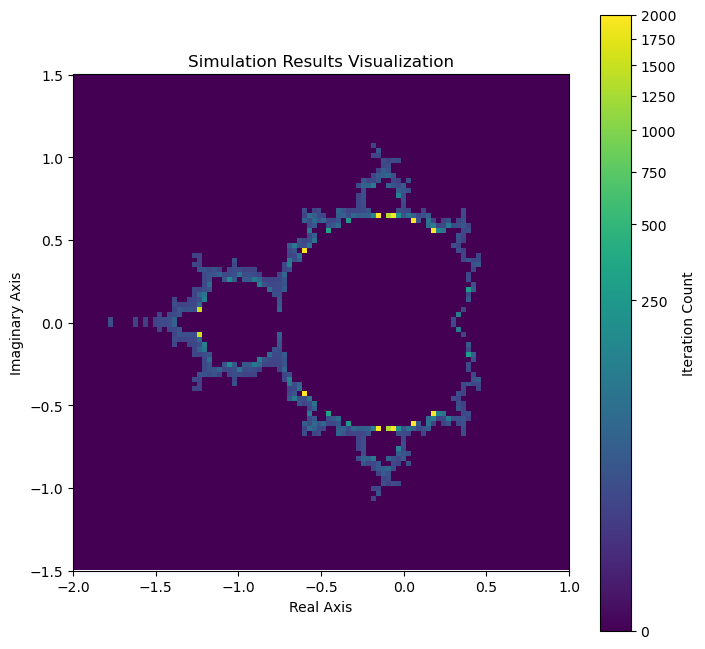

In [81]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 创建一个与初始网格大小相同的图像
visualization_grid = np.zeros((points_per_side, points_per_side))

# 填充图像
for point in simulation_results_array:
    x_range = point['x_range']
    y_range = point['y_range']
    iteration = point['iteration']

    # 计算对应网格中的索引
    x_indices = np.where((x_values >= x_range[0]) & (x_values < x_range[1]))[0]
    y_indices = np.where((y_values >= y_range[0]) & (y_values < y_range[1]))[0]

    for x_index in x_indices:
        for y_index in y_indices:
            visualization_grid[y_index, x_index] = iteration

# 创建一个颜色映射，较高的迭代次数对应较暗的颜色
cmap = plt.cm.viridis
norm = mcolors.PowerNorm(0.3, vmin=visualization_grid.min(), vmax=visualization_grid.max())

# 绘制可视化图像
plt.figure(figsize=(8, 8))
plt.imshow(visualization_grid, cmap=cmap, norm=norm, extent=[-2, 1, -1.5, 1.5])
plt.colorbar(label='Iteration Count')
plt.title('Simulation Results Visualization')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()


import部分

In [88]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random

总函数部分

In [325]:
def create_grid(boundary_grid_list):
    # 定义总模拟次数上限
    total_max_simulations = 300000

    # 计算每个网格的最大模拟次数
    num_points = len(boundary_grid_list)
    max_simulations_per_point = total_max_simulations // num_points

    # 找到不大于max_simulations_per_point的最大平方数
    square_root = int(math.sqrt(max_simulations_per_point))
    max_simulations_per_point_square = square_root ** 2

    # 对每个网格点进行均匀划分和模拟
    simulation_results_structured = []
    for point in boundary_grid_list:
        x_start, x_end = point['x_range']
        y_start, y_end = point['y_range']

        # 计算x和y的步长
        x_step = (x_end - x_start) / square_root
        y_step = (y_end - y_start) / square_root

        # 在每个小区域内进行模拟
        for i in range(square_root):
            for j in range(square_root):
                x = x_start + (i + 0.5) * x_step 
                y = y_start + (j + 0.5) * y_step 
                c = complex(x, y)  # 小区域的中心点
                iteration = mandelbrot(c, max_iter)
                x_range_small = [x, x + x_step]
                y_range_small = [y, y + y_step]
                simulation_results_structured.append((x_range_small, y_range_small, iteration))

    # 转换为numpy数组
    simulation_results_array = np.array(simulation_results_structured, dtype=structured_grid.dtype)
    return simulation_results_array

def select_boundary_grid(simulation_results_array,iteration_threshold,max_iter):

    # 根据迭代次数条件筛选元素
    array_0_to_iteration_threshold = simulation_results_array[simulation_results_array['iteration'] < iteration_threshold]
    array_iteration_threshold_to_1999 = simulation_results_array[(simulation_results_array['iteration'] >= iteration_threshold) & 
                                            (simulation_results_array['iteration'] < max_iter)]
    array_2000 = simulation_results_array[simulation_results_array['iteration'] == max_iter]

    return array_0_to_iteration_threshold, array_iteration_threshold_to_1999, array_2000

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter


main1

[-2.         -1.98996656 -1.97993311 -1.96989967 -1.95986622 -1.94983278
 -1.93979933 -1.92976589 -1.91973244 -1.909699   -1.89966555 -1.88963211
 -1.87959866 -1.86956522 -1.85953177 -1.84949833 -1.83946488 -1.82943144
 -1.81939799 -1.80936455 -1.7993311  -1.78929766 -1.77926421 -1.76923077
 -1.75919732 -1.74916388 -1.73913043 -1.72909699 -1.71906355 -1.7090301
 -1.69899666 -1.68896321 -1.67892977 -1.66889632 -1.65886288 -1.64882943
 -1.63879599 -1.62876254 -1.6187291  -1.60869565 -1.59866221 -1.58862876
 -1.57859532 -1.56856187 -1.55852843 -1.54849498 -1.53846154 -1.52842809
 -1.51839465 -1.5083612  -1.49832776 -1.48829431 -1.47826087 -1.46822742
 -1.45819398 -1.44816054 -1.43812709 -1.42809365 -1.4180602  -1.40802676
 -1.39799331 -1.38795987 -1.37792642 -1.36789298 -1.35785953 -1.34782609
 -1.33779264 -1.3277592  -1.31772575 -1.30769231 -1.29765886 -1.28762542
 -1.27759197 -1.26755853 -1.25752508 -1.24749164 -1.23745819 -1.22742475
 -1.2173913  -1.20735786 -1.19732441 -1.18729097 -1.

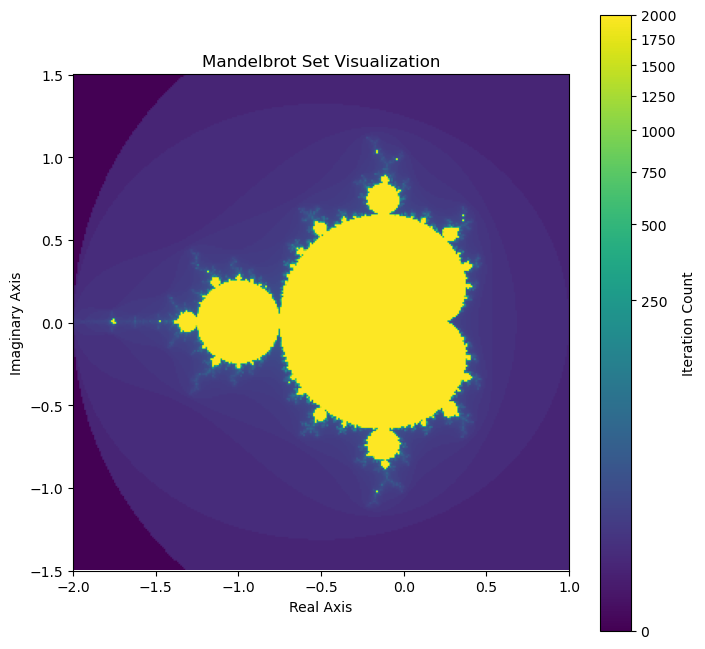

In [345]:
sample_size = 300
max_iter = 2000
x_range = [-2, 1]
y_range = [-1.5, 1.5]
init_threshold = 100
in_area, bound_area, out_area = 0,0,0 
# 计算每边的点数（近似平方根）
points_per_side = sample_size

# 在指定范围内生成均匀分布的点
x_values = np.linspace(x_range[0], x_range[1], points_per_side)
y_values = np.linspace(y_range[0], y_range[1], points_per_side)
print(x_values)
print(len(x_values))
# 对每个点进行迭代计算
results = []
for x in x_values:
    for y in y_values:
        c = complex(x, y)
        iteration = mandelbrot(c, max_iter)
        results.append((x, y, iteration))

# 定义结构化数据类型来存储每个点的x范围，y范围和迭代次数
dtype = [('x_range', float, (2,)), ('y_range', float, (2,)), ('iteration', int)]

# 创建一个结构化数组来存储这些值
structured_grid = np.zeros((points_per_side, points_per_side), dtype=dtype)

# 计算每个点的x和y范围以及迭代次数
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        c = complex(x + (1/points_per_side/2), y + (1/points_per_side/2))
        iteration = mandelbrot(c, max_iter)

        # 计算x和y的范围
        x_range = [x_values[0] + (i/points_per_side) * (x_values[-1] - x_values[0]), 
                   x_values[0] + ((i+1)/points_per_side) * (x_values[-1] - x_values[0])]
        y_range = [y_values[0] + (j/points_per_side) * (y_values[-1] - y_values[0]), 
                   y_values[0] + ((j+1)/points_per_side) * (y_values[-1] - y_values[0])]

        # 将这些值存储在结构化数组中
        structured_grid[j, i] = (x_range, y_range, iteration)

# 初始化计数器
count_less_than_threshold = 0
count_between_threshold_and_2000 = 0
count_equal_2000 = 0

# 遍历structured_grid来计算元素个数
for i in range(points_per_side):
    for j in range(points_per_side):
        iteration = structured_grid['iteration'][j, i]
        if iteration < init_threshold:
            count_less_than_threshold += 1
        elif init_threshold <= iteration < max_iter:
            count_between_threshold_and_2000 += 1
        elif iteration == max_iter:
            count_equal_2000 += 1

in_area += count_equal_2000 / sample_size / sample_size * 9
out_area += count_less_than_threshold / sample_size / sample_size * 9
bound_area = count_between_threshold_and_2000 / sample_size / sample_size * 9
print(count_equal_2000)
print(count_less_than_threshold)
print(count_between_threshold_and_2000)
print(f"in_area = {in_area}")
print(f"out_area = {out_area}")
print(f"bound_area = {bound_area}")

# 提取迭代次数数据用于绘图
iteration_data = structured_grid['iteration']

# 创建一个颜色映射，较高的迭代次数对应较暗的颜色
cmap = plt.cm.viridis
norm = mcolors.PowerNorm(0.3, vmin=iteration_data.min(), vmax=iteration_data.max())

# 绘制曼德布洛特集
plt.figure(figsize=(8, 8))
plt.imshow(iteration_data, cmap=cmap, norm=norm, extent=[-2, 1, -1.5, 1.5])
plt.colorbar(label='Iteration Count')
plt.title('Mandelbrot Set Visualization')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()

main2

352
352


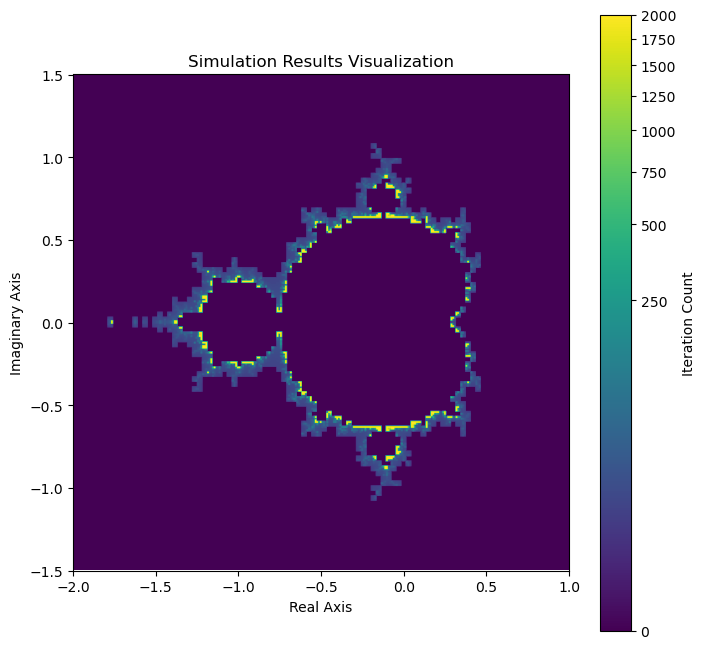

In [340]:
boundary_grid_list = []

# 收集迭代次数在10到1999之间的点，同时记录它们在原始网格中的索引
points_to_check = []
t = 0
for i in range(points_per_side):
    for j in range(points_per_side):
        if init_threshold <= structured_grid['iteration'][j, i] < max_iter:
            t += 1
            points_to_check.append((structured_grid[j, i], i, j))  # 存储点的数据和索引
#print(len(points_to_check))
print(t)
for point, x_index, y_index in points_to_check:
    boundary_grid_list.append(point)  # 加入初始点
print(len(boundary_grid_list))

# 将列表转换为numpy数组
boundary_grid = np.array(boundary_grid_list, dtype=structured_grid.dtype)
#print(len(points_to_check))
# 检查boundary_grid的一部分内容
#print(boundary_grid[:10])  # 展示前10个元素以示例

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 创建一个与初始网格大小相同的图像
visualization_grid = np.zeros((points_per_side, points_per_side))

# 填充图像
for point in simulation_results_array:
    x_range = point['x_range']
    y_range = point['y_range']
    iteration = point['iteration']

    # 计算对应网格中的索引
    x_indices = np.where((x_values >= x_range[0]) & (x_values < x_range[1]))[0]
    y_indices = np.where((y_values >= y_range[0]) & (y_values < y_range[1]))[0]

    for x_index in x_indices:
        for y_index in y_indices:
            visualization_grid[y_index, x_index] = iteration

# 创建一个颜色映射，较高的迭代次数对应较暗的颜色
cmap = plt.cm.viridis
norm = mcolors.PowerNorm(0.3, vmin=visualization_grid.min(), vmax=visualization_grid.max())

# 绘制可视化图像
plt.figure(figsize=(8, 8))
plt.imshow(visualization_grid, cmap=cmap, norm=norm, extent=[-2, 1, -1.5, 1.5])
plt.colorbar(label='Iteration Count')
plt.title('Simulation Results Visualization')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()


main3

In [347]:
for i in range(1,2):
    print(bound_area)
    print(len(boundary_grid))
    simulation_result = create_grid(boundary_grid)
    total_grid = len(simulation_result)
    print(len(simulation_result))
    out_grid, boundary_grid, in_grid = select_boundary_grid(simulation_result,init_threshold * 3 * i,max_iter)
    print(f"area:{bound_area},{len(in_grid) / len(simulation_result) * bound_area},{len(boundary_grid) / len(simulation_result) * bound_area},{len(out_grid) / len(simulation_result) * bound_area}")

    in_area += len(in_grid) / len(simulation_result) * bound_area
    out_area += len(out_grid) / len(simulation_result) * bound_area
    bound_area = len(boundary_grid) / len(simulation_result) * bound_area
    print(len(boundary_grid))
    print(f"in_area = {in_area}")
    print(f"out_area = {out_area}")
    print(f"bound_area = {bound_area}")

0.035199999999999995
870
87000
area:0.035199999999999995,0.022430491954022986,0.002012064367816092,0.010757443678160918
4973
in_area = 1.521930491954023
out_area = 7.476057443678161
bound_area = 0.002012064367816092
0.002012064367816092
4973
79568
area:0.002012064367816092,0.0005340183908045977,0.0002590436781609195,0.0012190022988505746
10244
in_area = 1.5224645103448278
out_area = 7.477276445977012
bound_area = 0.0002590436781609195


test

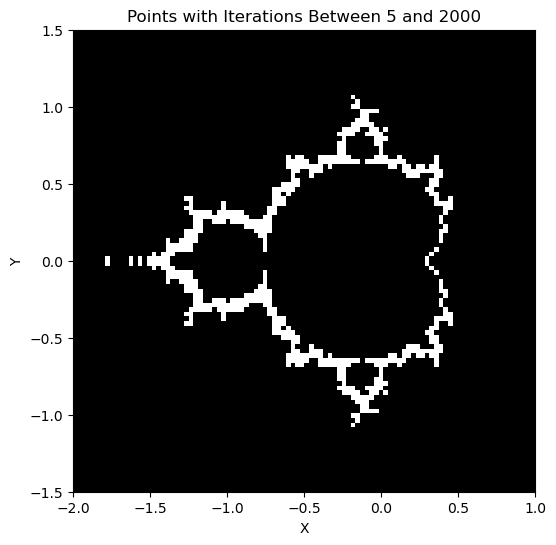

In [51]:
# 创建一个新的网格来可视化迭代次数在5到2000之间的点
visualization_grid = np.where((grid >= 10) & (grid < 2000), 1, 0)

# 使用Matplotlib绘制可视化图
plt.figure(figsize=(8, 6))
plt.imshow(visualization_grid, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='gray', origin='lower')
plt.title('Points with Iterations Between 5 and 2000')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


可视化

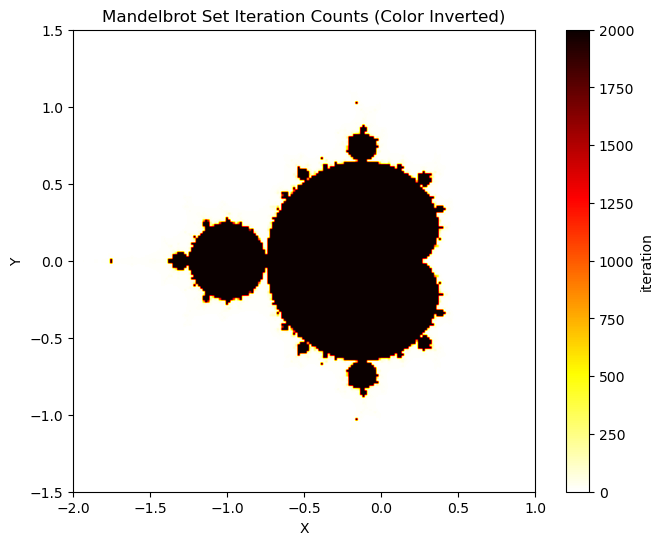

In [26]:
import matplotlib.pyplot as plt

# 将结果转换为NumPy数组以便处理
results_array = np.array(results)

# 提取X, Y坐标和迭代次数
X = results_array[:, 0]
Y = results_array[:, 1]
iterations = results_array[:, 2]

# 创建一个网格来绘制热图
X_grid, Y_grid = np.meshgrid(x_values, y_values)
iteration_grid = iterations.reshape(points_per_side, points_per_side)

# 使用反向的热图colormap
plt.figure(figsize=(8, 6))
plt.imshow(iteration_grid.T, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='hot_r', origin='lower')
plt.colorbar(label='iteration')
plt.title('Mandelbrot Set Iteration Counts (Color Inverted)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


迭代细化

In [53]:
# 定义一个函数来计算一个区域内所有点的迭代次数
def compute_grid(x_range, y_range, points_per_side, max_iter):
    x_values = np.linspace(x_range[0], x_range[1], points_per_side)
    y_values = np.linspace(y_range[0], y_range[1], points_per_side)
    grid = np.zeros((points_per_side, points_per_side), dtype=np.int)

    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            c = complex(x, y)
            iteration = mandelbrot(c, max_iter)
            grid[j, i] = iteration
    return grid, x_values, y_values

# 初始参数
sample_size = 200
max_iter = 2000
x_range = [-2, 1]
y_range = [-1.5, 1.5]

# 计算初始网格
initial_grid, initial_x_values, initial_y_values = compute_grid(x_range, y_range, sample_size, max_iter)

# 选择需要细化的区域，例如迭代次数在某个范围内的区域
refinement_threshold = (5, 200)
refinement_mask = (initial_grid >= refinement_threshold[0]) & (initial_grid <= refinement_threshold[1])

# 这只是一个示例，选择第一个需要细化的点来演示
refinement_points = np.argwhere(refinement_mask)
if len(refinement_points) > 0:
    first_point = refinement_points[0]
    x_refine_range = [initial_x_values[first_point[1]] - 0.1, initial_x_values[first_point[1]] + 0.1]
    y_refine_range = [initial_y_values[first_point[0]] - 0.1, initial_y_values[first_point[0]] + 0.1]

    # 对选定区域进行细化计算
    refined_grid, _, _ = compute_grid(x_refine_range, y_refine_range, sample_size, max_iter)

    # 展示细化后的网格的一小部分
    refined_grid[:5, :5]
else:
    "No points found for refinement"

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

使用类

In [54]:
class MandelbrotGrid:
    def __init__(self, x_range, y_range, resolution, max_iter):
        self.x_range = x_range
        self.y_range = y_range
        self.resolution = resolution
        self.max_iter = max_iter
        self.grid = self._compute_grid()

    def _compute_grid(self):
        x_values = np.linspace(self.x_range[0], self.x_range[1], self.resolution)
        y_values = np.linspace(self.y_range[0], self.y_range[1], self.resolution)
        grid = np.zeros((self.resolution, self.resolution), dtype=np.int32)

        for i, x in enumerate(x_values):
            for j, y in enumerate(y_values):
                c = complex(x, y)
                iteration = mandelbrot(c, self.max_iter)
                grid[j, i] = iteration
        return grid

# 使用新的类来创建初始网格
sample_size = 200
max_iter = 2000
x_range = [-2, 1]
y_range = [-1.5, 1.5]

# 创建MandelbrotGrid对象
initial_grid_obj = MandelbrotGrid(x_range, y_range, sample_size, max_iter)

# 展示部分网格数据（前5x5区域）
initial_grid_obj.grid[:5, :5]


array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])